In [1]:
%run "cnn_classification.ipynb"

Number of images: 11788
Number of training images by default: 5994
Number of testing images by default: 5794
Number of classes: 200

Number of images after augmentation: 11788
Number of training images after augmentation: 5994
Number of testing images: 5794



In [2]:
model = models.efficientnet_b1(weights="DEFAULT")

In [3]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [4]:
# freeze all layers for fine tuning (not doing this takes it very long to train)
for param in model.parameters():
    param.requires_grad = False

# number of inputs in last layer
num_ftrs = model.classifier[1].in_features

model.classifier[1] = nn.Linear(num_ftrs, num_out_ftrs)

# printing the last layer : classifier
print(model.classifier)

model = model.to(device)

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=200, bias=True)
)


In [5]:
print_model_params(model)

Total number of parameters in model: 6769384
Total number of training parameters in model: 256200


(6769384, 256200)

Training Started on cuda
Epoch 1/10

- - - - - - - - - - 
train Loss: 4.72 Acc: 9.41% Time_Taken: 1m 20s
test Loss: 3.95 Acc: 23.13% Time_Taken: 1m 1s

Epoch 2/10- - - - - - - - - - 
train Loss: 3.64 Acc: 29.25% Time_Taken: 1m 16s
test Loss: 3.21 Acc: 34.28% Time_Taken: 1m 0s

Epoch 3/10- - - - - - - - - - 
train Loss: 3.07 Acc: 39.01% Time_Taken: 1m 16s
test Loss: 2.71 Acc: 41.01% Time_Taken: 1m 0s

Epoch 4/10- - - - - - - - - - 
train Loss: 2.71 Acc: 43.88% Time_Taken: 1m 16s
test Loss: 2.52 Acc: 44.41% Time_Taken: 1m 0s

Epoch 5/10- - - - - - - - - - 
train Loss: 2.47 Acc: 48.25% Time_Taken: 1m 16s
test Loss: 2.34 Acc: 46.44% Time_Taken: 1m 0s

Epoch 6/10- - - - - - - - - - 
train Loss: 2.26 Acc: 53.45% Time_Taken: 1m 16s
test Loss: 2.15 Acc: 49.10% Time_Taken: 0m 60s

Epoch 7/10- - - - - - - - - - 
train Loss: 2.12 Acc: 54.85% Time_Taken: 1m 16s
test Loss: 2.13 Acc: 48.46% Time_Taken: 1m 0s

Epoch 8/10- - - - - - - - - - 
train Loss: 2.02 Acc: 55.56% Time_Taken: 1m 15s
test Loss: 2.01 Acc: 49.78% Time_Taken: 1m 1s

Ep

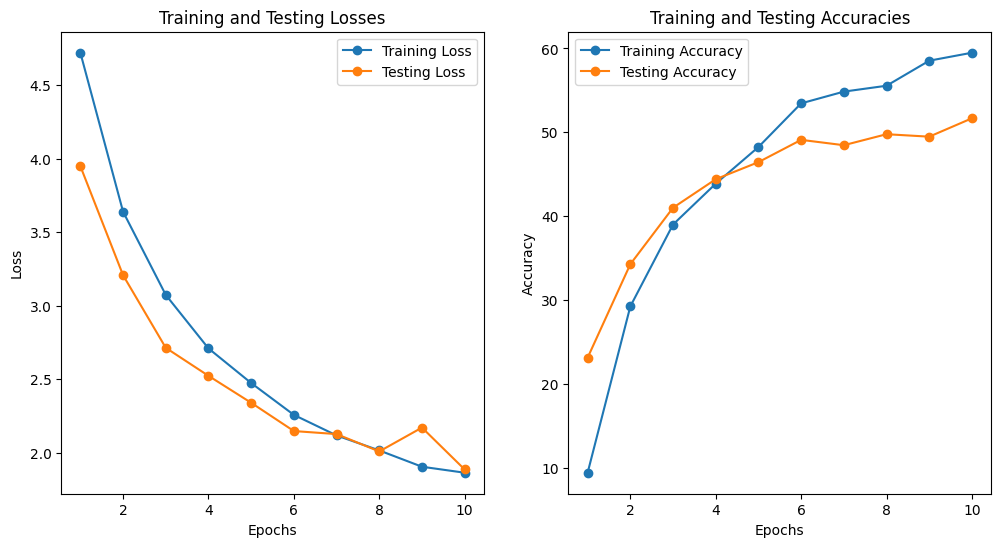

In [6]:
model, checkpoint = train_model(model, num_epoch=10)

In [7]:
for param in model.parameters():
    param.requires_grad = True

In [8]:
print_model_params(model)

Total number of parameters in model: 6769384
Total number of training parameters in model: 6769384


(6769384, 6769384)

Training Started on cuda
Epoch 1/10- - - - - - - - - - 
train Loss: 2.46 Acc: 40.49% Time_Taken: 2m 26s
test Loss: 1.84 Acc: 51.38% Time_Taken: 1m 0s

Epoch 2/10- - - - - - - - - - 
train Loss: 1.94 Acc: 52.04% Time_Taken: 2m 25s
test Loss: 1.57 Acc: 60.20% Time_Taken: 1m 1s

Epoch 3/10- - - - - - - - - - 
train Loss: 1.75 Acc: 56.49% Time_Taken: 2m 25s
test Loss: 1.56 Acc: 61.41% Time_Taken: 1m 0s

Epoch 4/10- - - - - - - - - - 
train Loss: 1.53 Acc: 61.68% Time_Taken: 2m 24s
test Loss: 1.78 Acc: 58.44% Time_Taken: 0m 59s

Epoch 5/10- - - - - - - - - - 
train Loss: 1.40 Acc: 65.10% Time_Taken: 2m 23s
test Loss: 1.80 Acc: 61.01% Time_Taken: 0m 58s

Epoch 6/10- - - - - - - - - - 
train Loss: 1.36 Acc: 65.88% Time_Taken: 2m 8s
test Loss: 1.80 Acc: 62.36% Time_Taken: 0m 50s

Epoch 7/10- - - - - - - - - - 
train Loss: 1.20 Acc: 70.17% Time_Taken: 2m 4s
test Loss: 1.74 Acc: 62.93% Time_Taken: 0m 48s

Epoch 8/10- - - - - - - - - - 
train Loss: 1.16 Acc: 70.92% Time_Taken: 2m 2s
test Loss: 1.

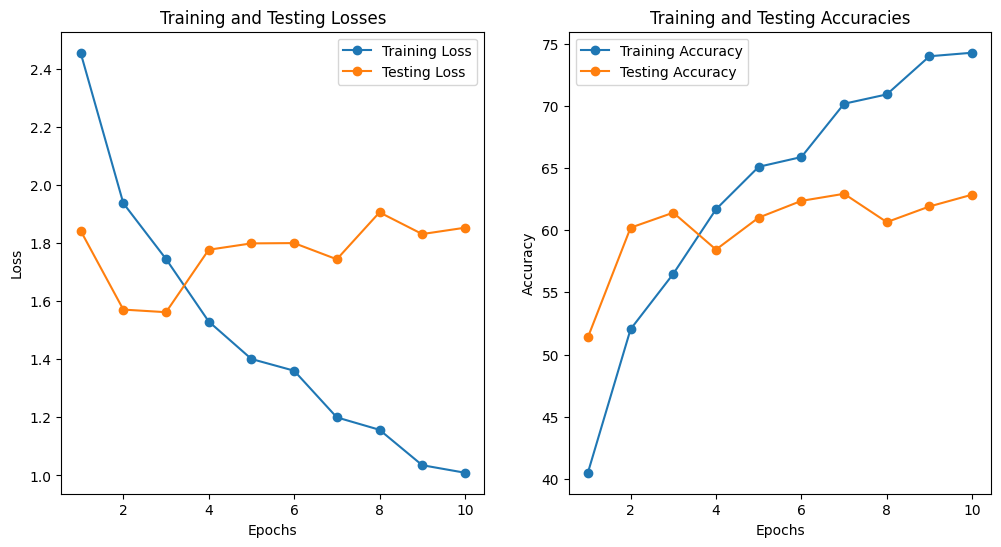

In [9]:
model, checkpoint = train_model(model, num_epoch=10, save_checkpoint=True)

In [12]:
time_taken = 12 + 42/60 + 22 + 22/60
print(f"Total Training Time: {time_taken:.2f}")
time_taken = 12 + 42/60 + 16
print(f"Total Training Time before the model started to overfit: {time_taken:.2f}")
print(f"Final Best Accuracy: {62.927166}")

Total Training Time: 35.07
Total Training Time before the model started to overfit: 28.70
Final Best Accuracy: 62.927166
